In [26]:
import numpy as np
from scipy import stats 
import pandas as pd
import pingouin as pg
from statsmodels.stats.descriptivestats import describe
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')

df = pd.read_csv('../data/Heart Disease/heart_2020_cleaned.csv')
#df = df[(np.abs (stats.zscore (df['BMI'])) < 2.5)]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [24]:
describe(df)

,BMI,PhysicalHealth,MentalHealth,SleepTime
nobs,312303.000000,312303.000000,312303.000000,312303.000000
missing,0.000000,0.000000,0.000000,0.000000
mean,27.812910,3.267769,3.821411,7.103124
std_err,0.000017,0.000025,0.000025,0.000005
upper_ci,27.812944,3.267818,3.821460,7.103133
lower_ci,27.812876,3.267720,3.821361,7.103115
std,5.403819,7.826546,7.874336,1.425600
iqr,7.200000,2.000000,3.000000,2.000000
iqr_normal,5.337368,1.482602,2.223903,1.482602
mad,4.309049,4.945686,5.343877,1.010552


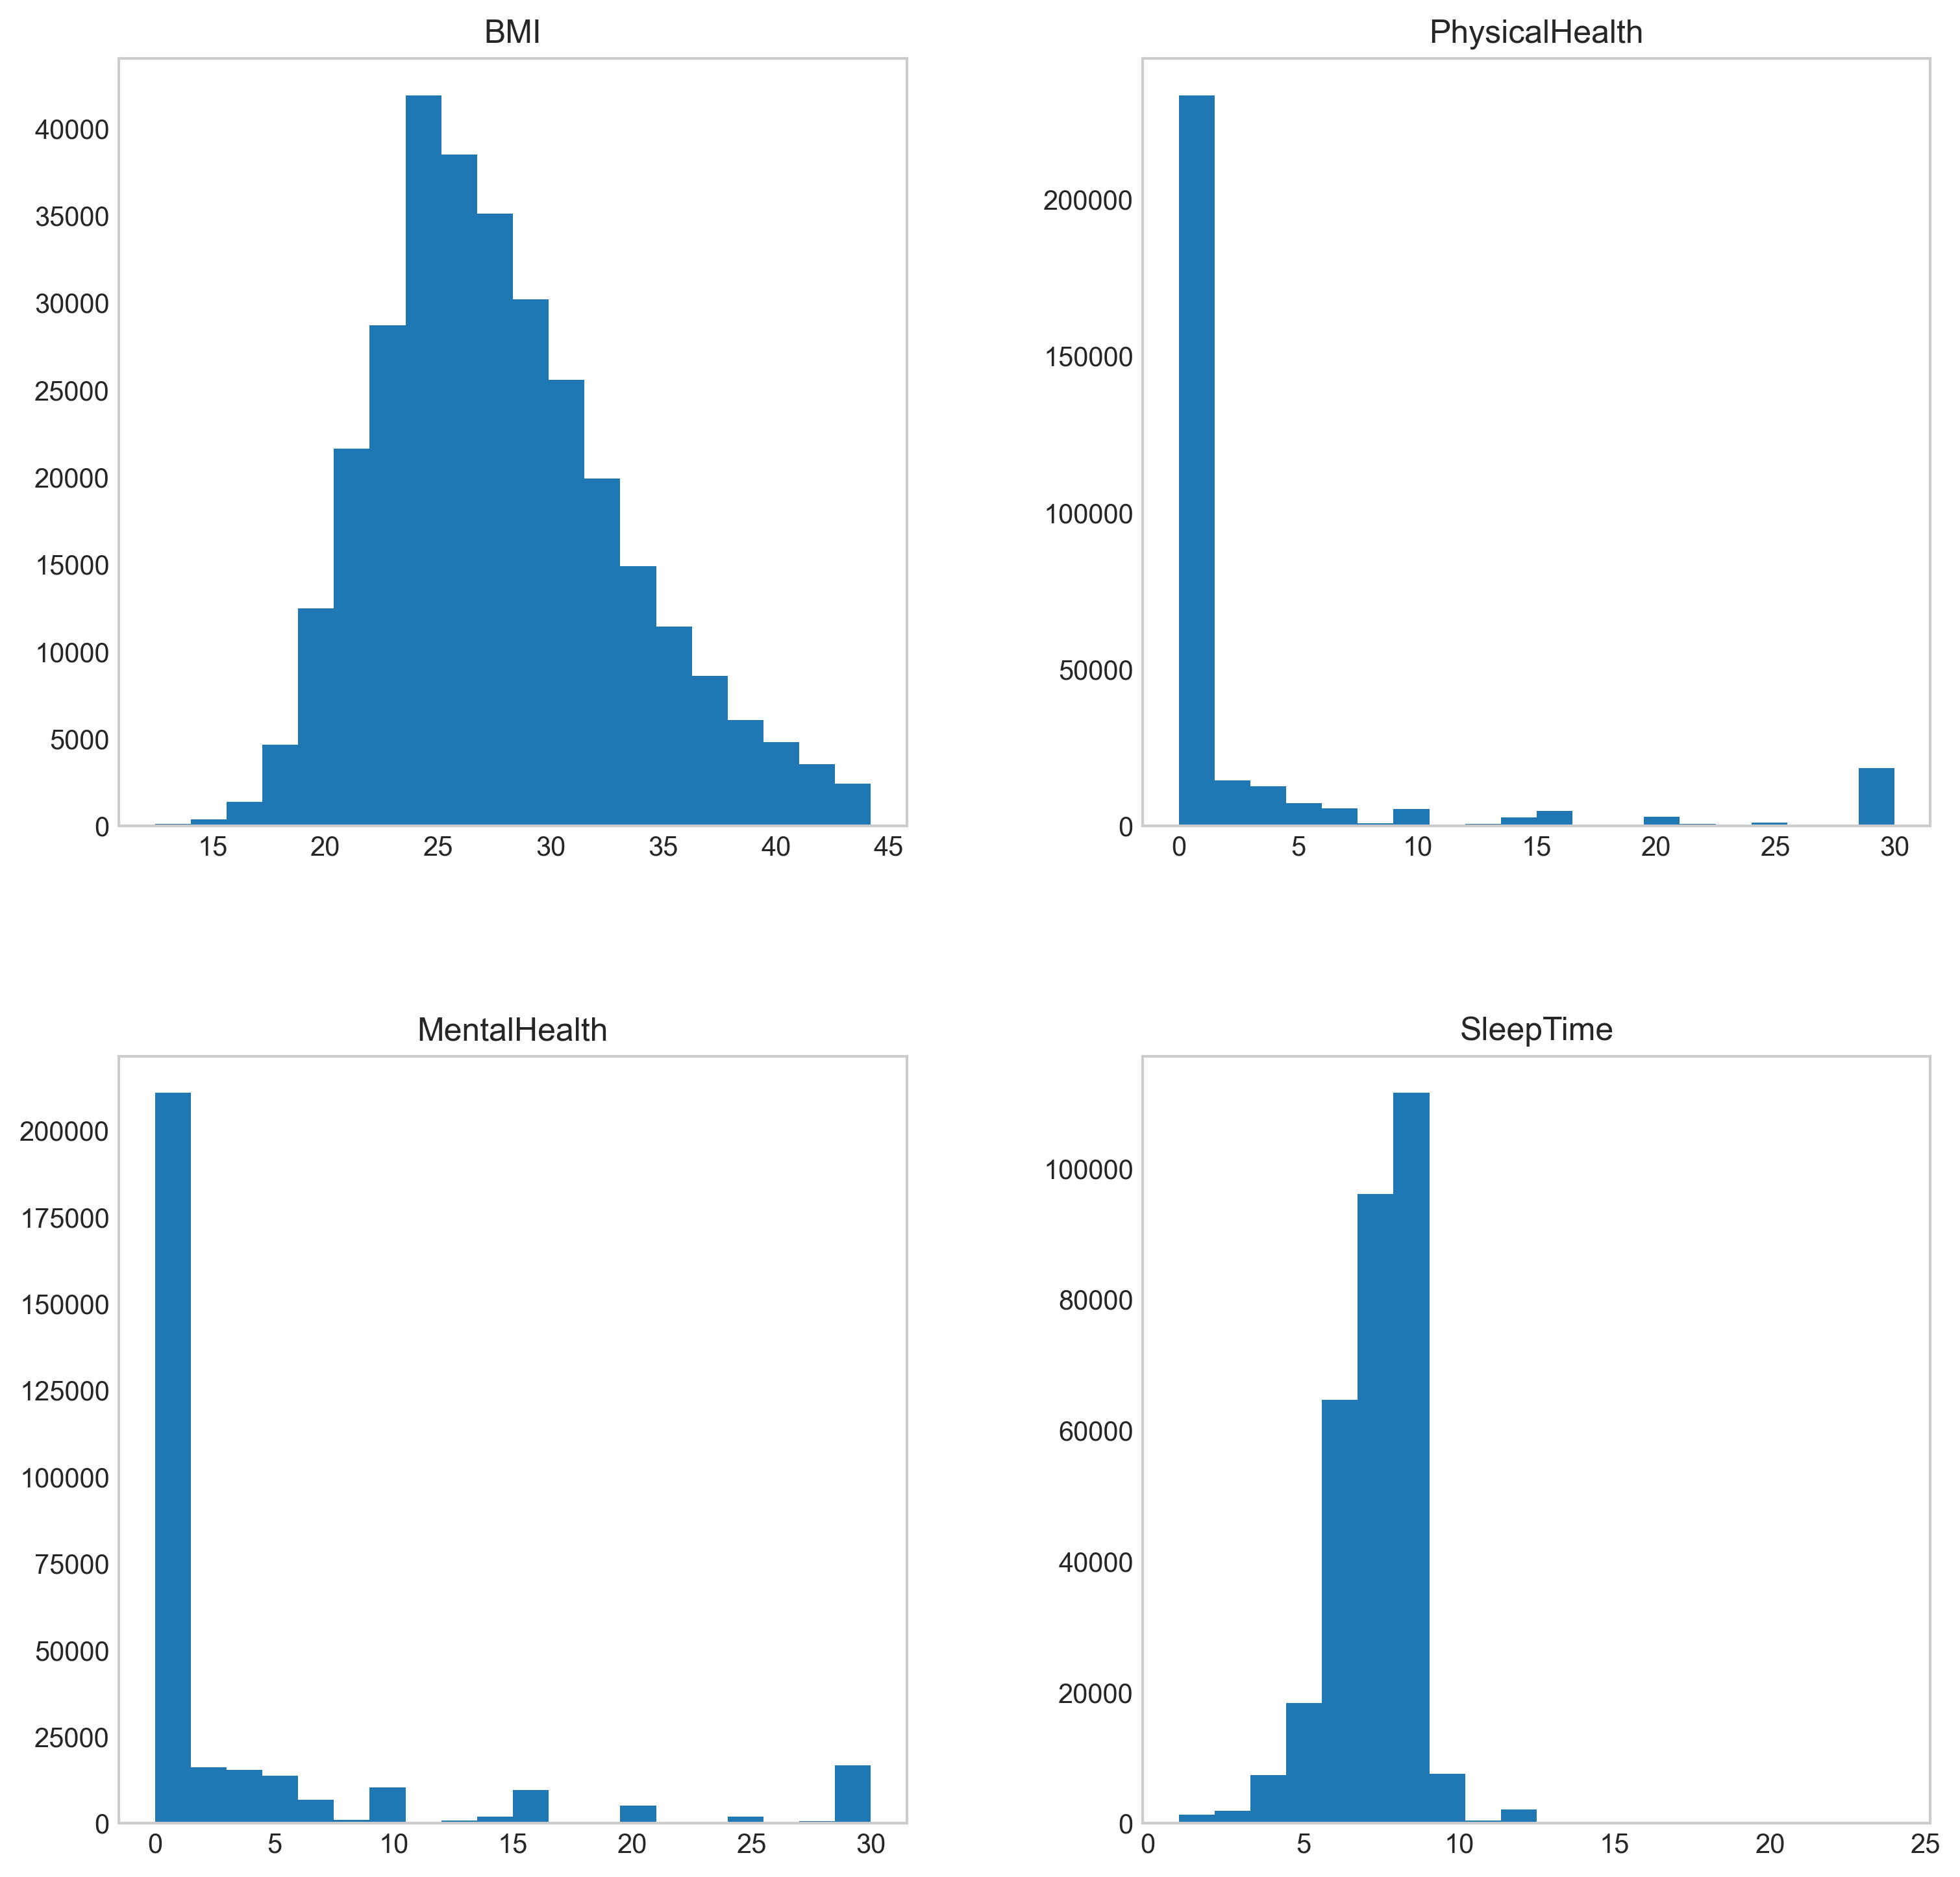

In [20]:
df.hist(figsize = (12,12), grid = False, bins = 20)

plt.show()

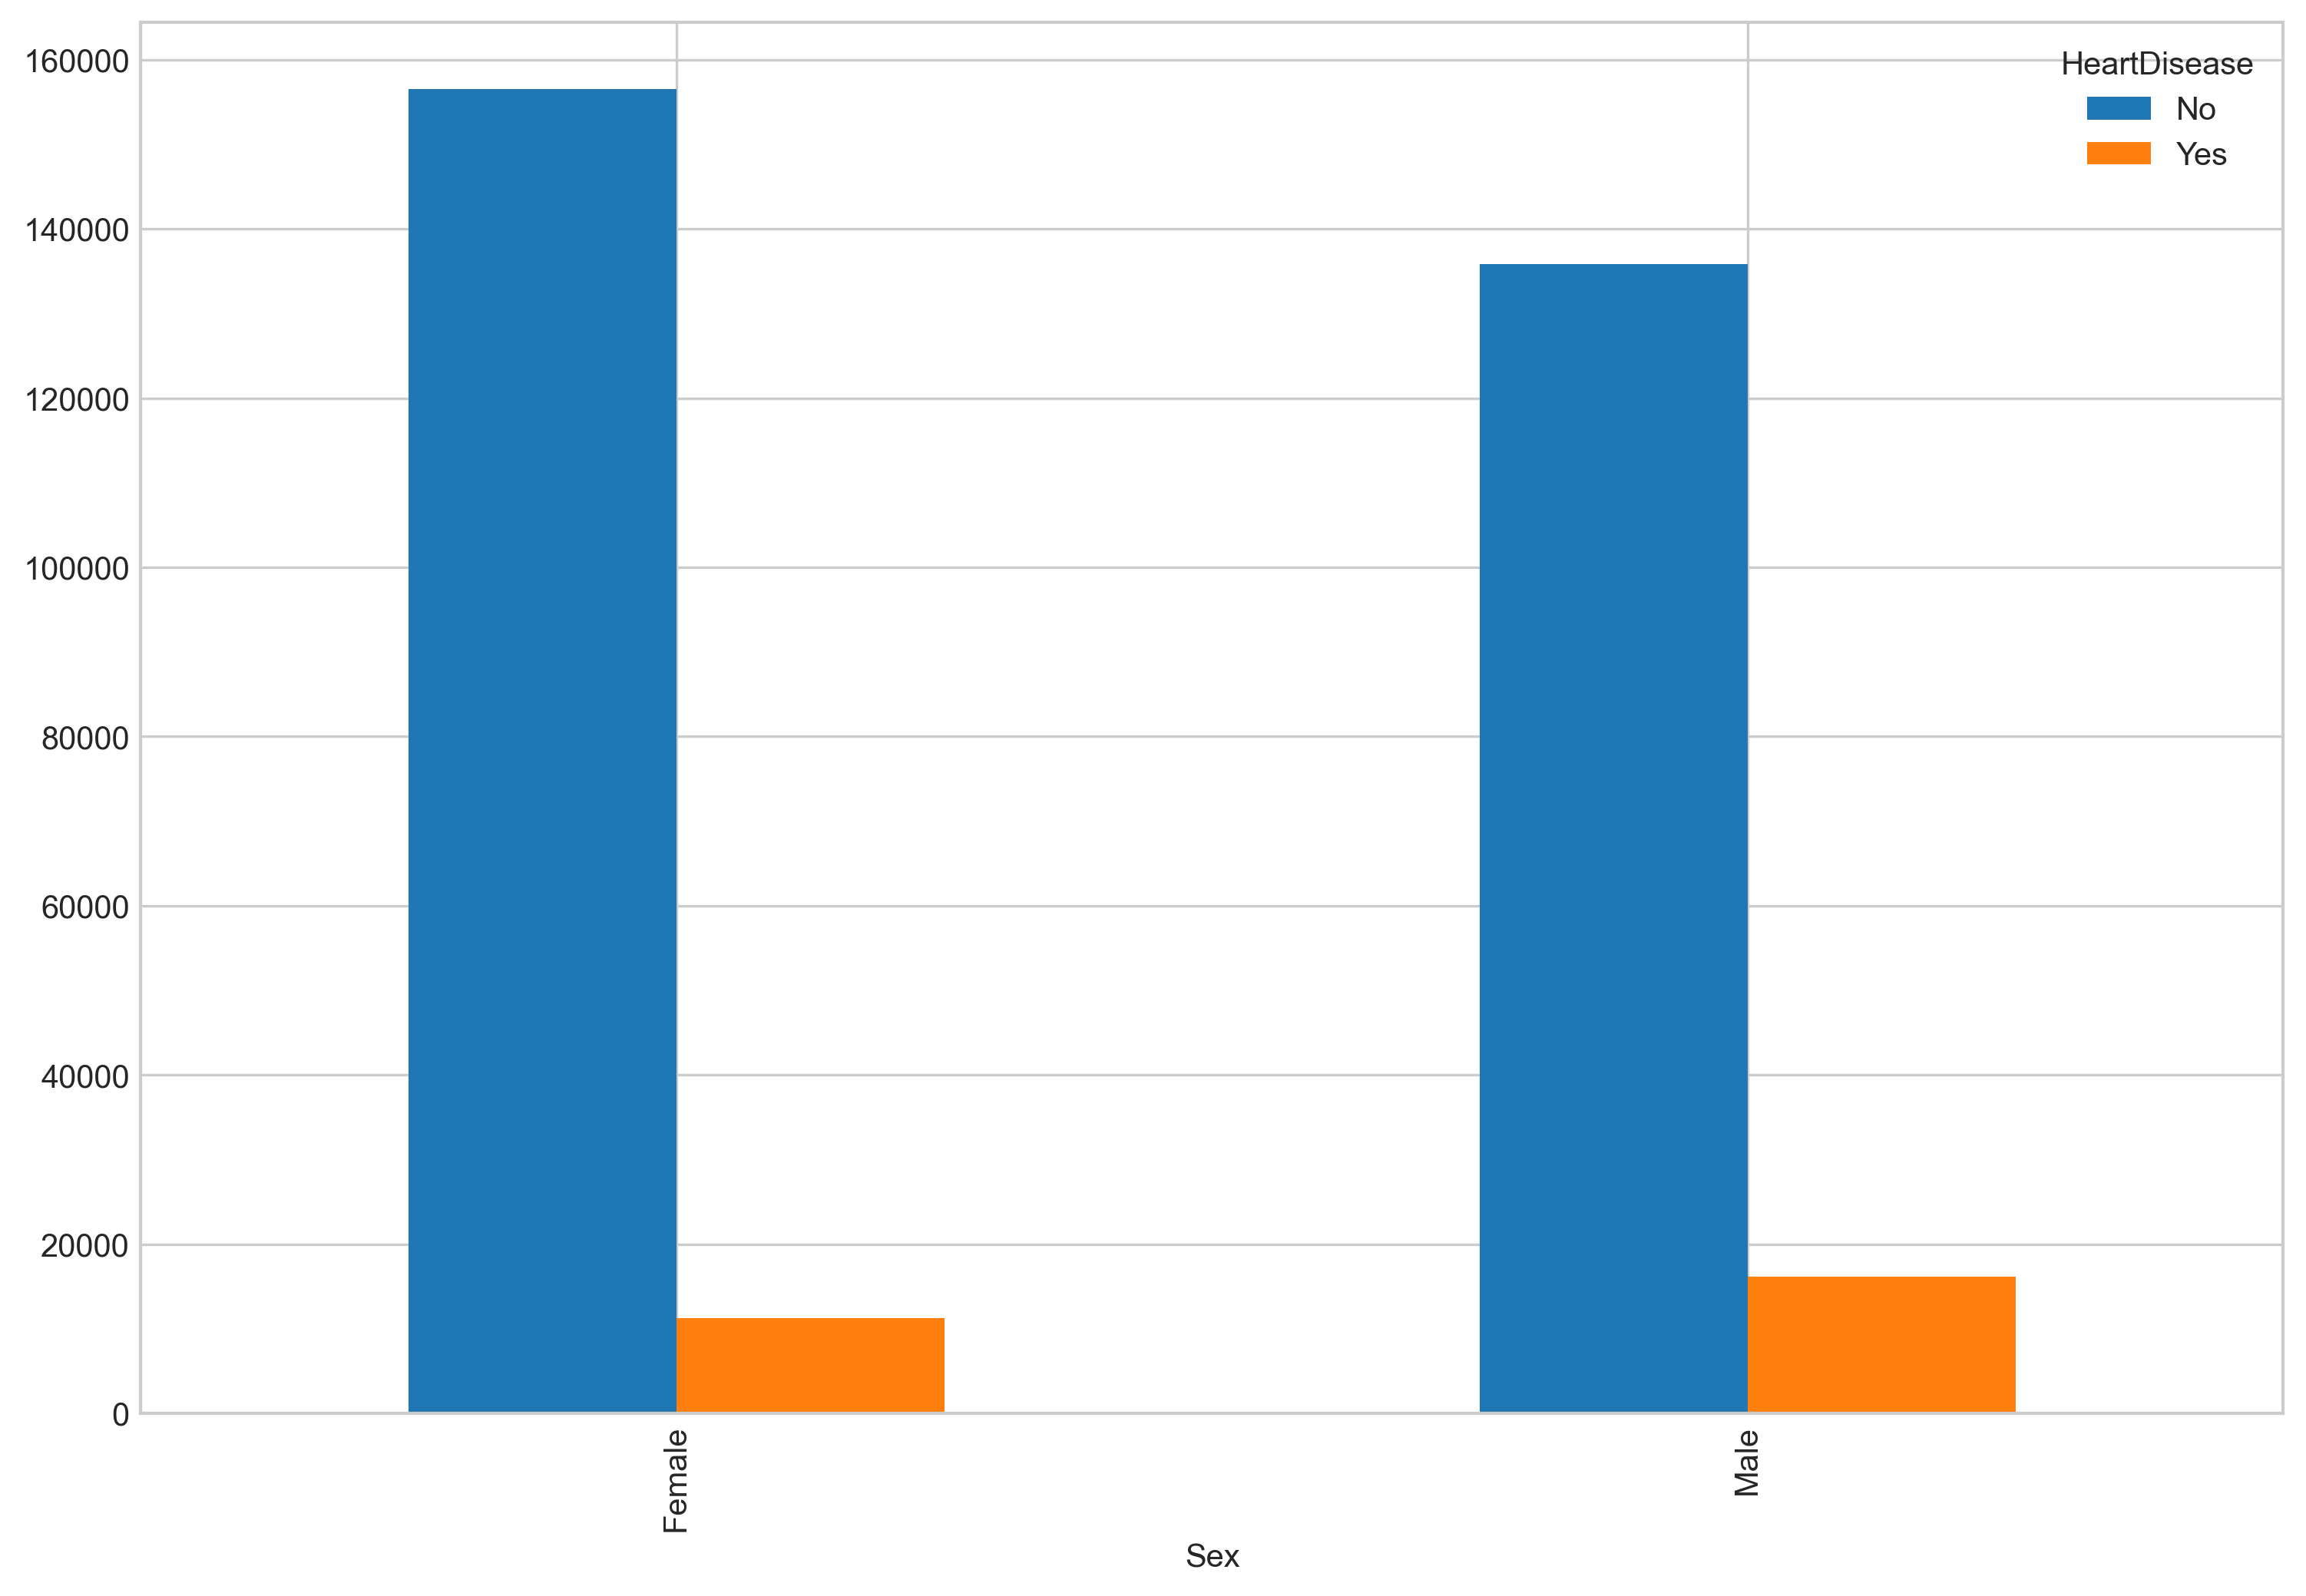

In [8]:
df_cont = pd.crosstab(df['Sex'], df['HeartDisease'])
df_cont.plot(figsize = (12,8), kind = 'bar')

plt.show()

In [55]:
exp, obs, stats = pg.chi2_independence(df, 'Sex', 'HeartDisease')

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1568.306917,1.0,0.0,0.070029,1.0
1,cressie-read,0.666667,1567.518069,1.0,0.0,0.070012,1.0
2,log-likelihood,0.000000,1570.144258,1.0,0.0,0.070070,1.0
3,freeman-tukey,-0.500000,1575.828016,1.0,0.0,0.070197,1.0
4,mod-log-likelihood,-1.000000,1584.748426,1.0,0.0,0.070395,1.0
5,neyman,-2.000000,1612.585428,1.0,0.0,0.071011,1.0


In [25]:
df.groupby('Race').median()

,BMI,PhysicalHealth,MentalHealth,SleepTime
Race,,,,
American Indian/Alaskan Native,28.32,0.0,0.0,7.0
Asian,24.56,0.0,0.0,7.0
Black,28.70,0.0,0.0,7.0
Hispanic,27.46,0.0,0.0,7.0
Other,27.37,0.0,0.0,7.0
White,27.10,0.0,0.0,7.0


In [12]:
dv = 'BMI'
group = 'Race'

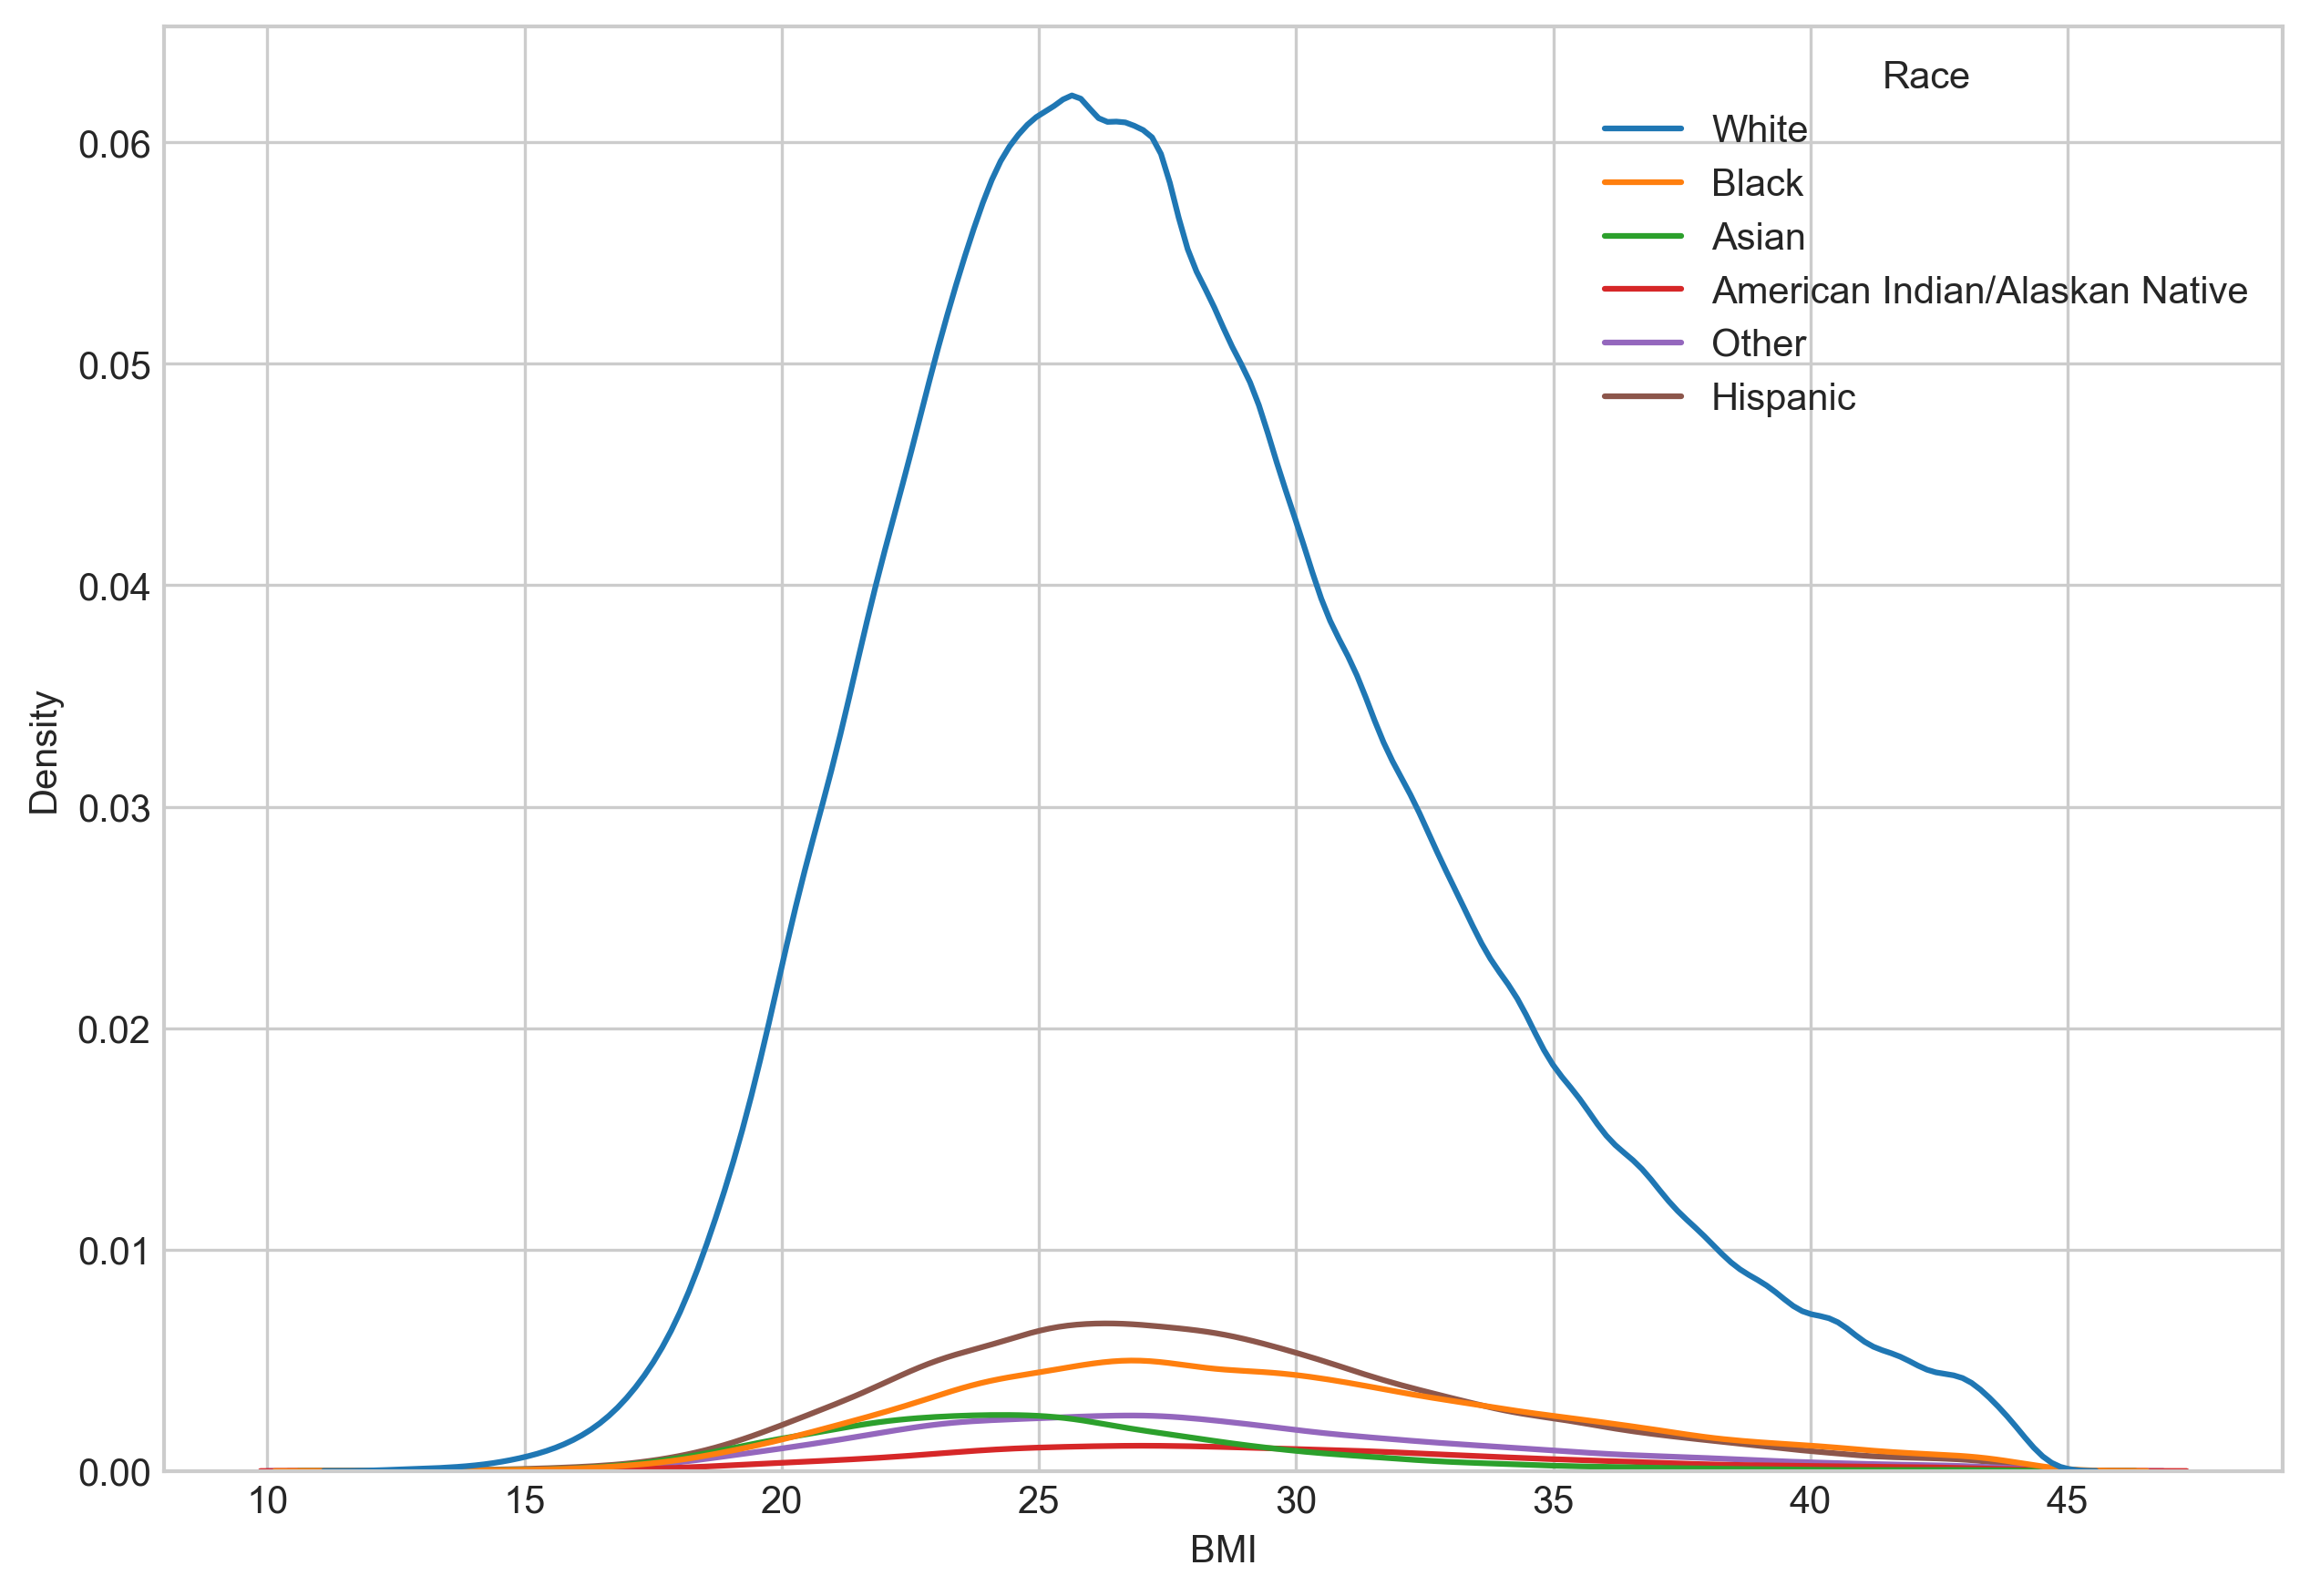

In [21]:
fig, ax = plt.subplots(figsize = (10,7))

sns.kdeplot(data = df, x = dv, hue = group,
            ax = ax)

plt.show()

In [22]:
pg.normality(df, dv = dv, group = group, method = 'jarque_bera')

,W,pval,normal
White,13640.209338,0.0,False
Black,591.498688,0.0,False
Asian,1333.882085,0.0,False
American Indian/Alaskan Native,124.949370,0.0,False
Other,458.217749,0.0,False
Hispanic,1043.707280,0.0,False


In [23]:
pg.kruskal(df, dv = dv, between = group, detailed = True)

,Source,ddof1,H,p-unc
Kruskal,Race,5,4151.51208,0.0
